In [50]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import umap
#dataset
data = pd.read_table("201028_GSE122505_Leukemia_clean.txt", sep = "\t")

In [51]:
#table of the disease
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [52]:
## Deux catégories dominent l’ensemble de données : la leucémie myéloïde aiguë (LAM) et la leucémie lymphoïde aiguë (LAL). 
## Pour faciliter la visualisation, nous regroupons certaines catégories.

In [53]:
#removing some disease type
data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]
data.shape
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
target.value_counts()

AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [54]:
## Nous avons sélectionné 7 composants en fonction de nos connaissances préalables, mais ce n’est pas toujours possible, il existe donc d’autres méthodes. 
## Nous utiliserons 2: le critère d’information Akaike (AIC) ou le critère d’information bayésien (BIC).

Text(0.5, 0, 'n_components')

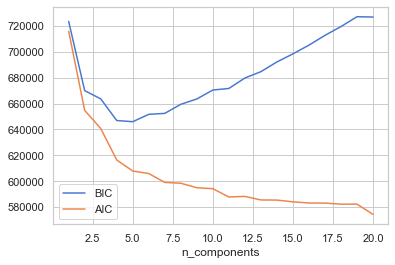

In [55]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [56]:
## Nous adaptons les données sur les composantes de l’APC.

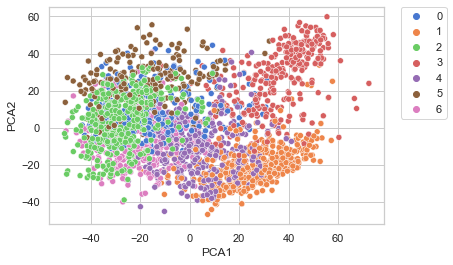

In [57]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=50)
X = pca.fit(df).transform(df)
#we fit the data
gmm = GaussianMixture(n_components=7)
gmm.fit(X)
#we plot the results
pca_df["GMM_labels"] = gmm.predict(X)
pca_df['GMM_labels'] = pca_df.GMM_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="GMM_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [61]:
# Une fois que notre modèle a convergé, les poids, les moyennes et les covariances devraient être résolus! 
# Nous pouvons les imprimer

print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[-2.06292261e+01  3.88645101e+01 -2.84498335e+00  3.59679418e+00
  -2.43310285e+00  8.59376019e+00 -1.28195591e+00 -9.88454763e-01
  -3.69667655e+00  8.51765128e-01 -1.28291599e+00  3.50023621e-02
   5.95288834e-01 -7.86007177e-01  1.02003309e-01 -1.27758825e+00
   6.50514989e-01  4.16165084e-01  1.03400444e+00  2.82353630e-01
  -6.22204908e-01 -1.50019581e-01 -4.91418461e-01 -1.58092575e-02
  -1.51772284e-01  4.37298863e-01  4.92772893e-01 -1.11291440e+00
  -1.49130758e-01 -2.48880382e-01 -2.34561577e-01  5.13977960e-02
  -3.37914005e-01  4.21186105e-01  5.53200711e-01 -4.69263548e-01
  -2.95375639e-01  1.36455294e-04 -5.41089947e-01  4.73640629e-01
  -4.53144234e-01 -1.25288140e-01  1.90593522e-01  3.39179594e-01
   2.09679441e-01 -3.97070488e-02  2.33445984e-01  1.09700981e-01
  -1.98012299e-01  1.21115461e-01]
 [ 3.05403284e+01  1.61724107e+00 -1.83202058e+01  7.40940481e+00
   1.85621776e+00 -8.68578201e+00  1.41755909e+00 -6.62165195e-01
  -9.45047310e-01  4.48579715e-01 -3.7434